<a href="https://colab.research.google.com/github/GruAna/VU/blob/master/results_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Text detection and recognition
### Results visualisation

In [1]:
import os
import re
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# list files with results

results_dir = '/content/drive/MyDrive/Colab_Notebooks/VU/results/'
(_, _, filenames) = next(os.walk(results_dir))
filenames = [ file for file in filenames if file.endswith(".txt") ]

filenames.sort()
list_result_paths = [os.path.join(results_dir, file) for file in filenames]

In [4]:
results = []

# Reading from a file

for filename in list_result_paths:
    with open(filename, "r+") as file:
        results.append(re.split(': |\n| = ', file.read()))



In [5]:
labels = [" ".join(text[0:2]) for text in results]
values = list(zip(*results))
iou = [round(float(v),2) for v in values[3]]
cer = [round(float(v),2) for v in values[5]]

Plot util functions

In [6]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

def autolabel(rects):
    """
    Attach a text label above each bar in *rects*, displaying its height.
    """
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

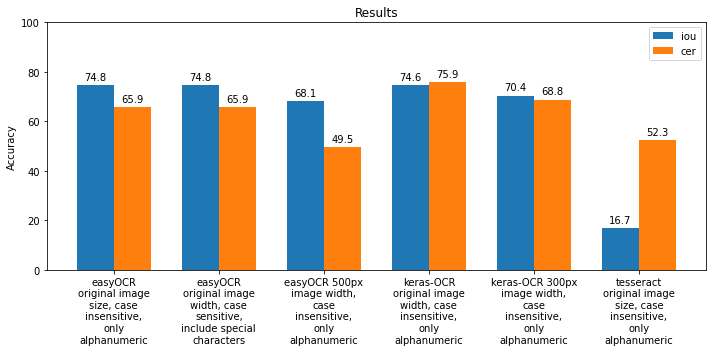

In [7]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(1,1,figsize=(10, 5))
rects1 = ax.bar(x - width/2, iou, width, label='iou')
rects2 = ax.bar(x + width/2, cer, width, label='cer')

ax.set_ylabel('Accuracy')
ax.set_title('Results')
ax.set_xticks(x)

ax.set_ylim([0, 100])
ax.set_xticklabels(labels)
wrap_labels(ax, 15)

ax.legend()
fig.tight_layout()
autolabel(rects1)
autolabel(rects2)

plt.show()